# Fashion-MNIST Classification Project

This project aims to build and compare different deep learning models for classifying images from the Fashion-MNIST dataset. We will explore the impact of increasing model complexity, from a simple Artificial Neural Network (ANN) to more sophisticated Convolutional Neural Networks (CNNs), on performance and efficiency.

**Project Agenda & Steps:**

1.  **Dataset Setup:**
    *   Import necessary libraries.
    *   Load the Fashion-MNIST dataset.
    *   Preprocess the data (normalize and reshape images, one-hot encode labels).
    *   Verify the shapes of the processed data.

2.  **Model Building:**
    *   Define the architecture for each model:
        *   Basic ANN Model
        *   Basic CNN Model
        *   Deeper CNN Model

3.  **Model Training:**
    *   Train each model using the prepared training data.
    *   Implement Early Stopping and Model Checkpointing to optimize training and save the best model weights.

4.  **Model Evaluation:**
    *   Load the best weights for each trained model.
    *   Evaluate each model's performance on the test set using metrics like loss and accuracy.
    *   Visualize the training history (accuracy and loss curves) for comparison.
    *   Generate and visualize confusion matrices to understand model performance on each class.

5.  **Prediction Analysis:**
    *   Use the best performing model (Basic CNN in this case) to make predictions on the test set.
    *   Identify and visualize examples of both correctly and incorrectly classified images to gain insights into model behavior.

**Goal:** To analyze and demonstrate how model complexity influences classification accuracy and efficiency on the Fashion-MNIST dataset.

# Assignment Has been Submitted at the end of the Notebook
## Assignment: CIFAR-100 Image Classification

### 1. Dataset Setup Documentation

#### 1.1) Library Imports

This section imports the essential libraries:  
- **NumPy** for numerical operations  
- **TensorFlow / Keras** for building and training deep learning models  
- **Matplotlib** for visualizations  

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots

#### 1.2) Load Dataset

Load the **Fashion-MNIST** dataset from Keras, splitting it into:  
- `train_images`, `train_labels` → training set  
- `test_images`, `test_labels` → test set  


In [4]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#### 1.3) Normalize Data

Scale pixel values from **0–255** to the range **0–1** for faster and more stable training.  

**Example:**  
- Before: a pixel value could be `200`  
- After: `200 / 255 ≈ 0.78`  


In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

#### 1.4) Reshape Data

Reshape images to **28×28×1** by adding a channel dimension, making them compatible with CNN layers.  

**Example:**  
- Before: `(60000, 28, 28)` → 60,000 grayscale images without channel info  
- After: `(60000, 28, 28, 1)` → channel dimension (`1`) added for CNN input  


In [6]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

#### 1.5) One-Hot Encode Labels

Convert class labels (0–9) into **one-hot encoded vectors** with 10 output classes, required for multi-class classification.  

**Example:**  
- Original label: `3`  
- One-hot encoded: `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`  


In [7]:
train_labels_one_hot = keras.utils.to_categorical(train_labels, num_classes=10)
test_labels_one_hot = keras.utils.to_categorical(test_labels, num_classes=10)

#### 1.6) Verify Dataset Shapes

Print the shapes of images and labels after preprocessing to confirm everything is in the expected format.  

**Example output:**  
- Training images shape: `(60000, 28, 28, 1)`  
- Testing images shape: `(10000, 28, 28, 1)`  
- Training labels shape: `(60000, 10)`  
- Testing labels shape: `(10000, 10)`  


In [8]:
print("Training images shape:", train_images.shape)
print("Testing images shape:", test_images.shape)
print("Training labels shape:", train_labels_one_hot.shape)
print("Testing labels shape:", test_labels_one_hot.shape)

Training images shape: (60000, 28, 28, 1)
Testing images shape: (10000, 28, 28, 1)
Training labels shape: (60000, 10)
Testing labels shape: (10000, 10)


### 2. Model Building

#### 2.1) Basic ANN Model

- **Flatten (28×28→784)** → 0 params  
- **Dense (128, ReLU)** → 100,480 params  
- **Dense (64, ReLU)** → 8,256 params  
- **Dense (10, Softmax)** → 650 params  

**Total params:** ~109K  

In [9]:
ann_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

ann_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

ann_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

#### 2.2) Basic CNN Model

- **Conv2D (32, 3×3) + MaxPool** → 320 params  
- **Conv2D (64, 3×3) + MaxPool** → 18,496 params  
- **Flatten**  
- **Dense (64, ReLU)** → 102,464 params  
- **Dense (10, Softmax)** → 650 params  

**Total params:** ~121K  

In [10]:
basic_cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


basic_cnn_model.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

basic_cnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

#### 2.3) Deeper CNN Model

- **Conv2D (32, 3×3) + BN + MaxPool + Dropout** → 320 + 64 params  
- **Conv2D (64, 3×3) + BN + MaxPool + Dropout** → 18,496 + 128 params  
- **Conv2D (128, 3×3) + BN + MaxPool + Dropout** → 73,856 + 256 params  
- **Flatten**  
- **Dense (128, ReLU) + BN + Dropout** → 147,584 + 256 params  
- **Dense (10, Softmax)** → 1,290 params  

**Total params:** ~242K  

In [11]:
deeper_cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(10, activation='softmax')
])

deeper_cnn_model.compile(optimizer='adam',
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

deeper_cnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,882 (437.04 KB)

 Trainable params: 111,178 (434.29 KB)

 Non-trainable params: 704 (2.75 KB)

### 3. Train models

#### 3.1) Training ANN Model

- **EarlyStopping**: monitors validation loss, stops if no improvement for 5 epochs, restores best weights.  
- **ModelCheckpoint**: saves best ANN weights (`best_ann_model_weights.weights.h5`) based on validation loss.  
- **Training**:  
  - Epochs: up to 30 (early stopping controls actual run)  
  - Batch size: 64  
  - Validation on test set  
  - Callbacks: EarlyStopping + ModelCheckpoint  

In [12]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model_checkpoint_ann = keras.callbacks.ModelCheckpoint(
    filepath='best_ann_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training ANN model...")
ann_history = ann_model.fit(
    train_images,
    train_labels_one_hot,
    epochs=30,
    batch_size=64,
    validation_data=(test_images, test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_ann]
)
print("ANN model training finished.")

Training ANN model...
Epoch 1/30
935/938 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7714 - loss: 0.6779
Epoch 1: val_loss improved from inf to 0.47354, saving model to best_ann_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7716 - loss: 0.6772 - val_accuracy: 0.8317 - val_loss: 0.4735
Epoch 2/30
922/938 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8611 - loss: 0.3887
Epoch 2: val_loss improved from 0.47354 to 0.38530, saving model to best_ann_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8612 - loss: 0.3885 - val_accuracy: 0.8629 - val_loss: 0.3853
Epoch 3/30
936/938 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8763 - loss: 0.3338
Epoch 3: val_loss did not improve from 0.38530
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8763 - loss: 0.3338 - val_accuracy: 0.8592 - val_loss: 0.3867
Epoch 4/30
931/938 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8842 - loss: 0.3115
Epoch 4: val_loss improved from 0.38

#### 3.2) Training Basic CNN Model

- **ModelCheckpoint**: saves best Basic CNN weights (`best_basic_cnn_model_weights.weights.h5`) based on validation loss.  
- **Training**:  
  - Epochs: up to 30 (early stopping controls actual run)  
  - Batch size: 64  
  - Validation on test set  
  - Callbacks: EarlyStopping + ModelCheckpoint

In [13]:
model_checkpoint_basic_cnn = keras.callbacks.ModelCheckpoint(
    filepath='best_basic_cnn_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training Basic CNN model...")
basic_cnn_history = basic_cnn_model.fit(
    train_images,
    train_labels_one_hot,
    epochs=30,
    batch_size=64,
    validation_data=(test_images, test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_basic_cnn]
)
print("Basic CNN model training finished.")

Training Basic CNN model...
Epoch 1/30
936/938 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7522 - loss: 0.7137
Epoch 1: val_loss improved from inf to 0.36267, saving model to best_basic_cnn_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 36s 38ms/step - accuracy: 0.7525 - loss: 0.7130 - val_accuracy: 0.8690 - val_loss: 0.3627
Epoch 2/30
937/938 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8780 - loss: 0.3340
Epoch 2: val_loss improved from 0.36267 to 0.32129, saving model to best_basic_cnn_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 34ms/step - accuracy: 0.8780 - loss: 0.3340 - val_accuracy: 0.8840 - val_loss: 0.3213
Epoch 3/30
936/938 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8941 - loss: 0.2900
Epoch 3: val_loss improved from 0.32129 to 0.30610, saving model to best_basic_cnn_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.8941 - loss: 0.2900 - val_accuracy: 0.8893 - val_loss: 0.3061
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━

#### 3.3) Training Deeper CNN Model

- **ModelCheckpoint**: saves best Deeper CNN weights (`best_deeper_cnn_model_weights.weights.h5`) based on validation loss.  
- **Training**:  
  - Epochs: up to 30 (early stopping controls actual run)  
  - Batch size: 64  
  - Validation on test set  
  - Callbacks: EarlyStopping + ModelCheckpoint  

In [14]:
model_checkpoint_deeper_cnn = keras.callbacks.ModelCheckpoint(
    filepath='best_deeper_cnn_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training Deeper CNN model...")
deeper_cnn_history = deeper_cnn_model.fit(
    train_images,
    train_labels_one_hot,
    epochs=30,
    batch_size=64,
    validation_data=(test_images, test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_deeper_cnn]
)
print("Deeper CNN model training finished.")

Training Deeper CNN model...
Epoch 1/30
937/938 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6334 - loss: 1.1060
Epoch 1: val_loss improved from inf to 0.45743, saving model to best_deeper_cnn_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 48s 49ms/step - accuracy: 0.6336 - loss: 1.1052 - val_accuracy: 0.8312 - val_loss: 0.4574
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8101 - loss: 0.5291
Epoch 2: val_loss did not improve from 0.45743
938/938 ━━━━━━━━━━━━━━━━━━━━ 44s 47ms/step - accuracy: 0.8102 - loss: 0.5291 - val_accuracy: 0.8198 - val_loss: 0.4826
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8405 - loss: 0.4474
Epoch 3: val_loss improved from 0.45743 to 0.35325, saving model to best_deeper_cnn_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 85s 50ms/step - accuracy: 0.8405 - loss: 0.4473 - val_accuracy: 0.8715 - val_loss: 0.3532
Epoch 4/30
937/938 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8539 - loss: 0.4082
Epoch

### 4. Model Evaluation

#### 4.1) Model Evaluation Code Explanation

Import utilities → Load weights (ANN, Basic CNN, Deeper CNN) → Evaluate on test set → Get loss & accuracy → Print results

/tmp/ipython-input-2215778233.py:42: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


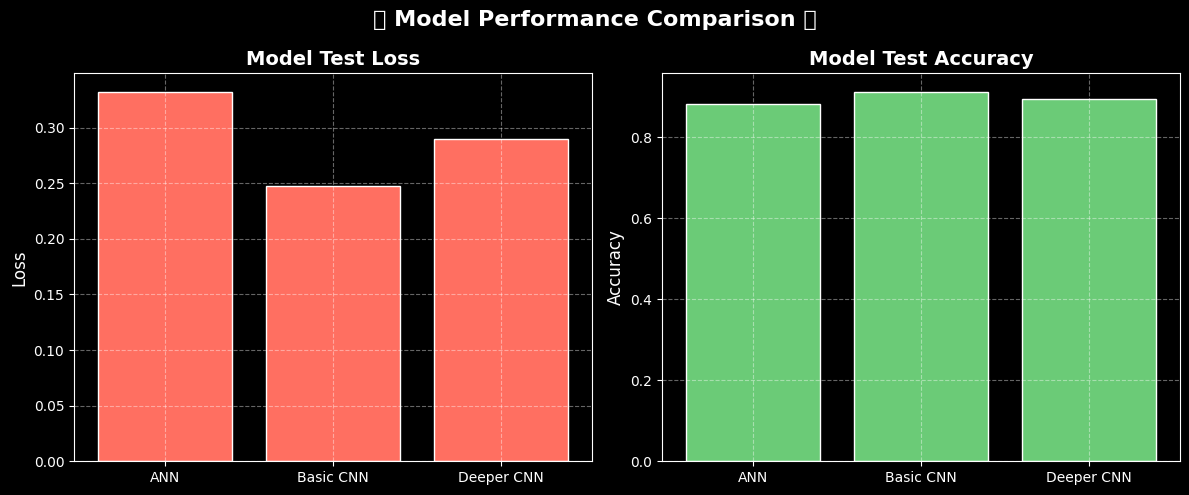

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

ann_model.load_weights('best_ann_model_weights.weights.h5')
basic_cnn_model.load_weights('best_basic_cnn_model_weights.weights.h5')
deeper_cnn_model.load_weights('best_deeper_cnn_model_weights.weights.h5')

loss_ann, accuracy_ann = ann_model.evaluate(test_images, test_labels_one_hot, verbose=0)
loss_basic_cnn, accuracy_basic_cnn = basic_cnn_model.evaluate(test_images, test_labels_one_hot, verbose=0)
loss_deeper_cnn, accuracy_deeper_cnn = deeper_cnn_model.evaluate(test_images, test_labels_one_hot, verbose=0)


import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['ANN', 'Basic CNN', 'Deeper CNN']
losses = [loss_ann, loss_basic_cnn, loss_deeper_cnn]
accuracies = [accuracy_ann, accuracy_basic_cnn, accuracy_deeper_cnn]

# Dark mode style
plt.style.use("dark_background")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Loss plot
axes[0].bar(models, losses, color='#FF6F61', edgecolor='white')
axes[0].set_title('Model Test Loss', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.4)

# Accuracy plot
axes[1].bar(models, accuracies, color='#6BCB77', edgecolor='white')
axes[1].set_title('Model Test Accuracy', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.4)

# Overall title
plt.suptitle("✨ Model Performance Comparison ✨", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


#### 4.2) Model Evaluation (Confusion Matrix & Report)

- Predict test images (ANN, Basic CNN, Deeper CNN)  
- Convert one-hot labels to integers  
- Get predicted labels with `argmax`  
- Print confusion matrix & classification report for each model


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


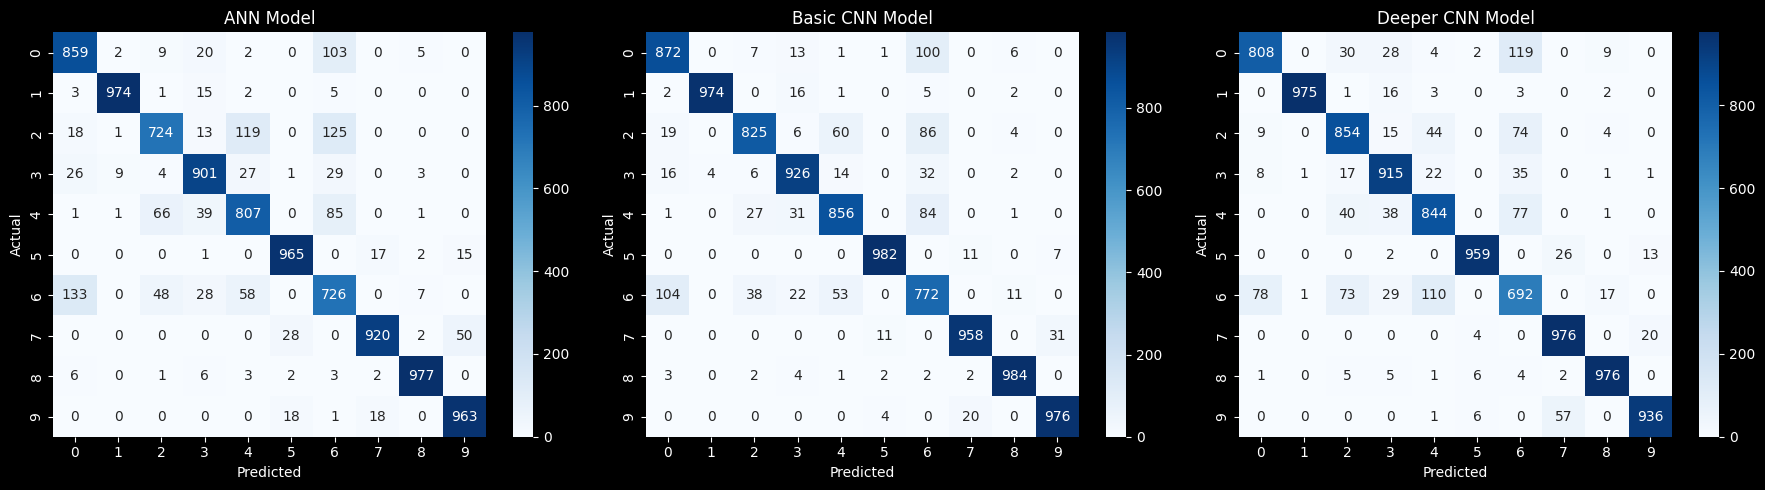

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predictions
ann_predictions = ann_model.predict(test_images)
basic_cnn_predictions = basic_cnn_model.predict(test_images)
deeper_cnn_predictions = deeper_cnn_model.predict(test_images)

# Convert labels
test_labels_int = np.argmax(test_labels_one_hot, axis=1)

ann_predicted_labels = np.argmax(ann_predictions, axis=1)
basic_cnn_predicted_labels = np.argmax(basic_cnn_predictions, axis=1)
deeper_cnn_predicted_labels = np.argmax(deeper_cnn_predictions, axis=1)

# Confusion matrices
cm_ann = confusion_matrix(test_labels_int, ann_predicted_labels)
cm_basic = confusion_matrix(test_labels_int, basic_cnn_predicted_labels)
cm_deeper = confusion_matrix(test_labels_int, deeper_cnn_predicted_labels)

# Plot side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(cm_ann, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("ANN Model")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_basic, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Basic CNN Model")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

sns.heatmap(cm_deeper, annot=True, fmt="d", cmap="Blues", ax=axes[2])
axes[2].set_title("Deeper CNN Model")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()

#### 4.3) Model Comparison

- Created a dataframe to store **test loss** and **test accuracy** for ANN, Basic CNN, and Deeper CNN.  
- Plotted training history for each model (accuracy & loss vs. epochs).  
- Helps compare how models learn and generalize over time.  

In [17]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

models = {
    "ANN": ("cyan", ann_history),
    "Basic CNN": ("magenta", basic_cnn_history),
    "Deeper CNN": ("yellow", deeper_cnn_history)
}

performance_data = {
    'Model': ['ANN', 'Basic CNN', 'Deeper CNN'],
    'Test Loss': [loss_ann, loss_basic_cnn, loss_deeper_cnn],
    'Test Accuracy': [accuracy_ann, accuracy_basic_cnn, accuracy_deeper_cnn]
}

performance_df = pd.DataFrame(performance_data)

fig = make_subplots(rows=1, cols=2, subplot_titles=('Accuracy', 'Loss'))

for name, (color, history) in models.items():
    # Accuracy
    fig.add_trace(go.Scatter(y=history.history['accuracy'], mode='lines',
                             name=name, line=dict(color=color, dash='solid')), row=1, col=1)
    fig.add_trace(go.Scatter(y=history.history['val_accuracy'], mode='lines',
                             name=name, line=dict(color=color, dash='dot'), showlegend=False), row=1, col=1)

    # Loss
    fig.add_trace(go.Scatter(y=history.history['loss'], mode='lines',
                             name=name, line=dict(color=color, dash='solid')), row=1, col=2)
    fig.add_trace(go.Scatter(y=history.history['val_loss'], mode='lines',
                             name=name, line=dict(color=color, dash='dot'), showlegend=False), row=1, col=2)

fig.update_layout(
    title_text="Model Comparison: Accuracy & Loss (Train=Solid, Val=Dot)",
    height=500,
    width=1200,
    template="plotly_dark"
)

fig.show()

#### 4.4) Predictions

This code:
- Uses the trained **Basic CNN model** to predict on test images.  
- Identifies **correctly** and **incorrectly** classified samples.  
- Randomly selects 100 correct and 100 incorrect predictions.  
- Displays them in a **20×10 grid**:  
  - ✅ Correct predictions → **Green title** (only predicted label).  
  - ❌ Incorrect predictions → **Red title** (Predicted vs True label).  


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


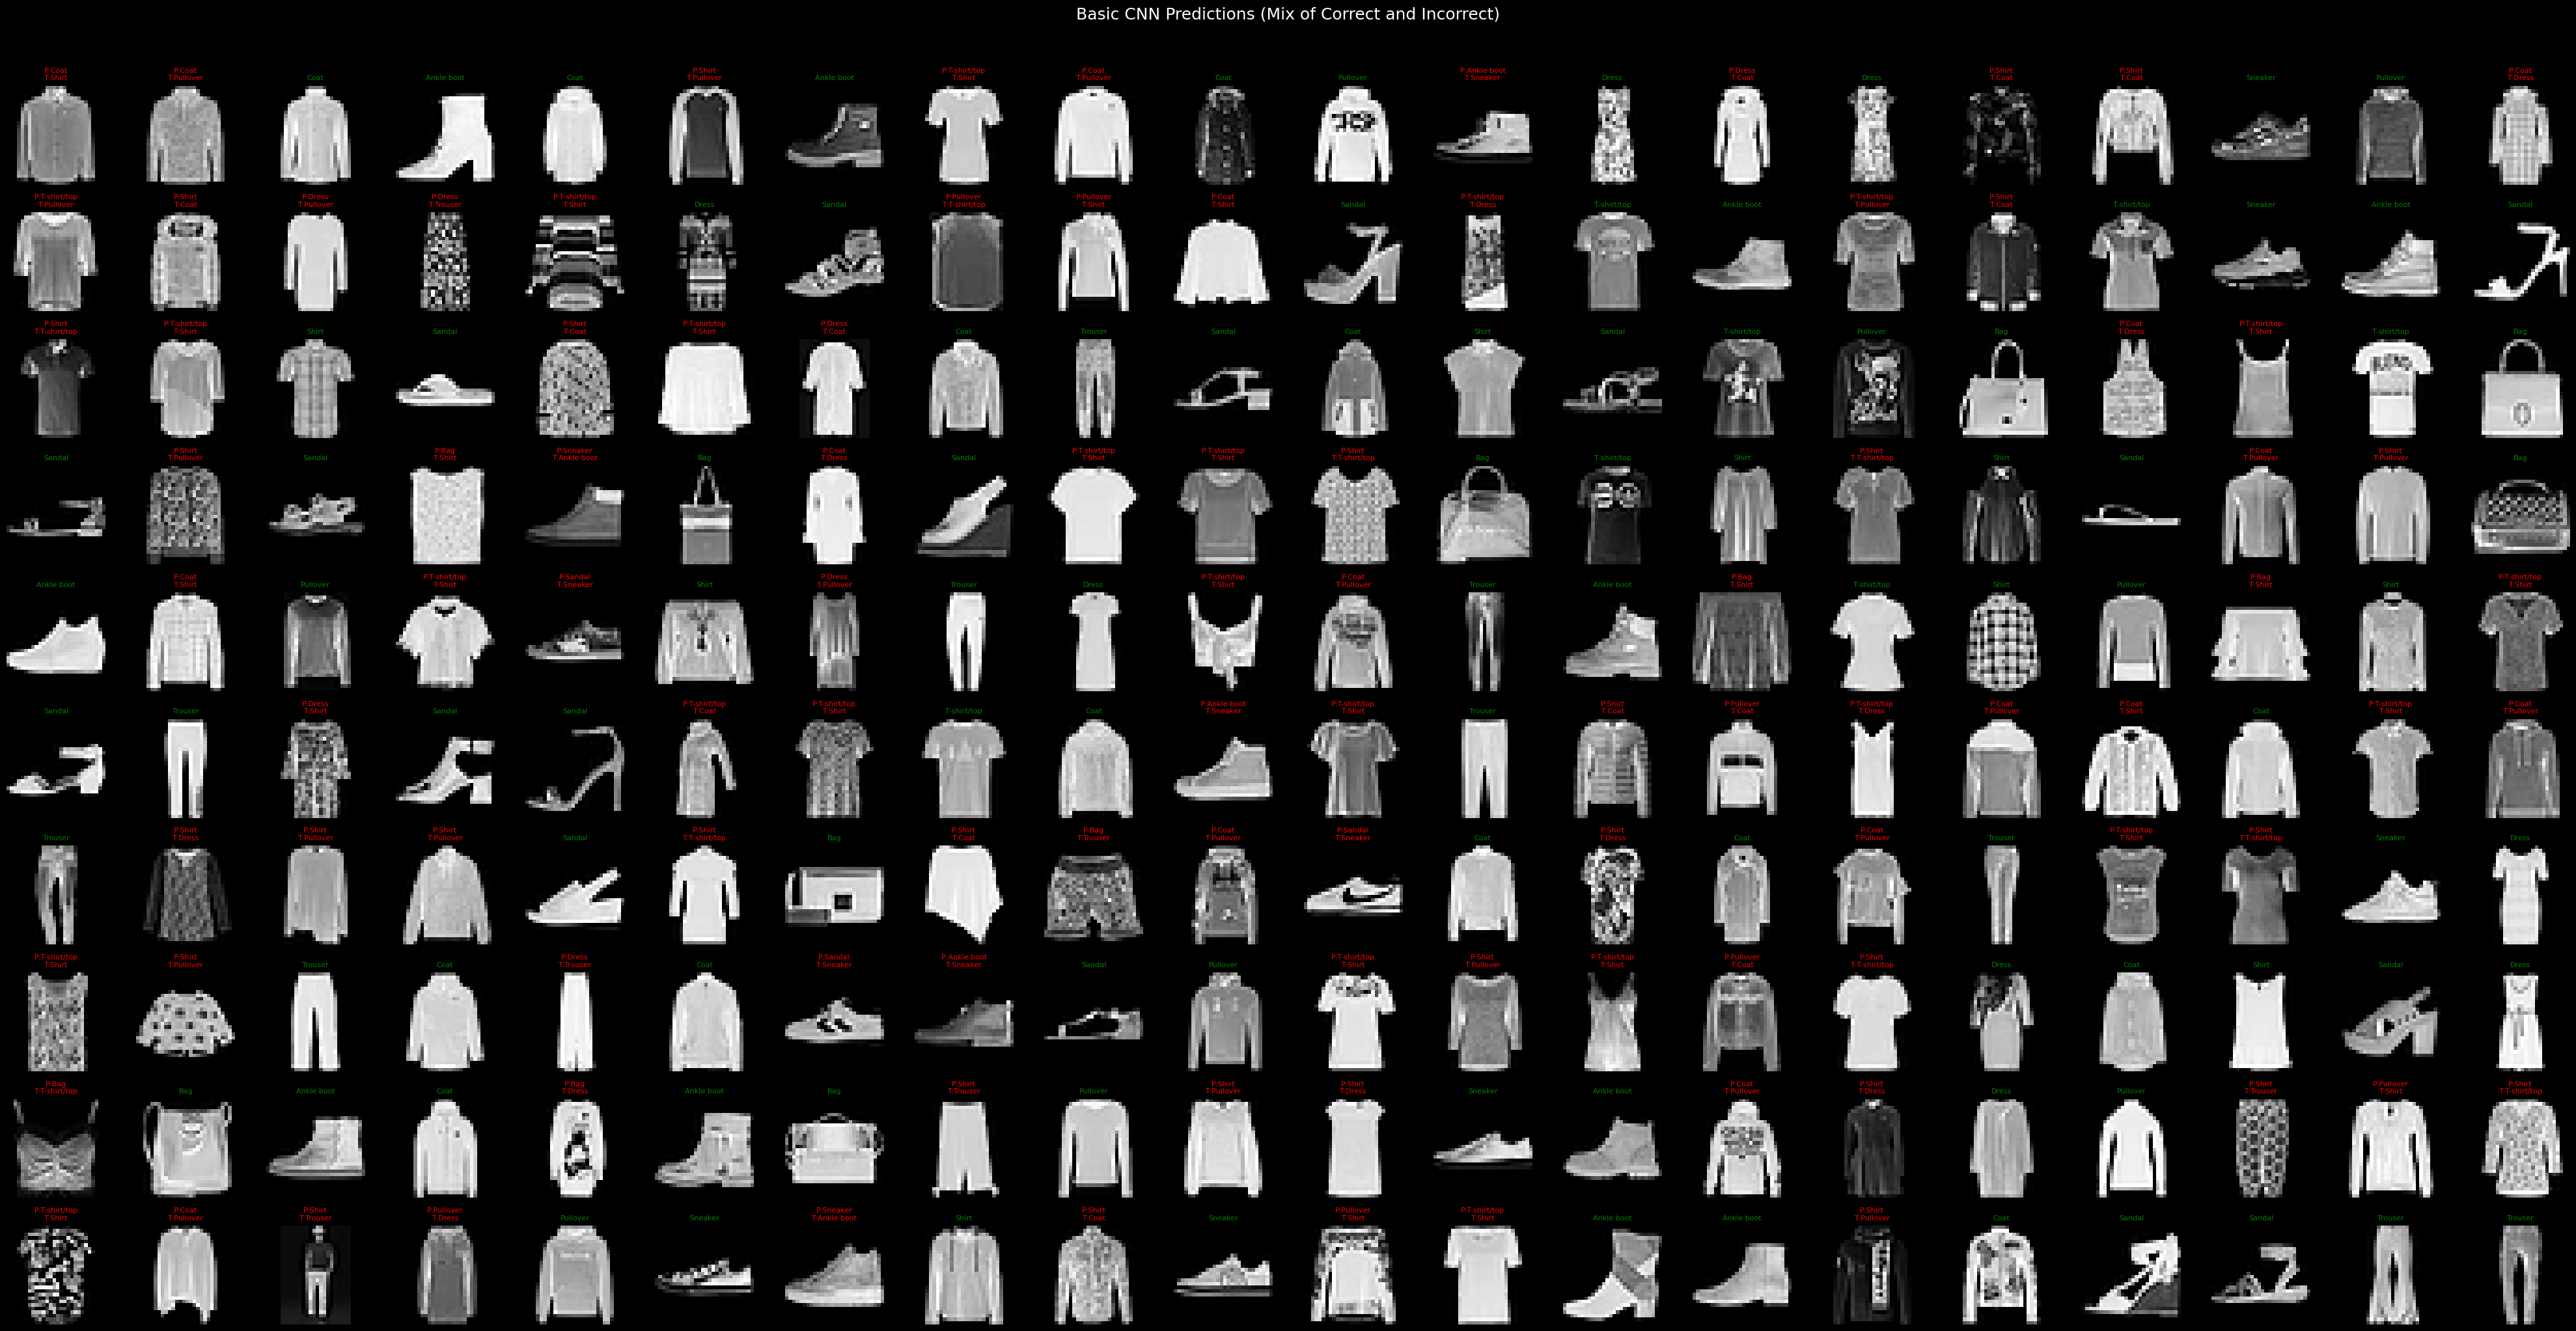

In [18]:
basic_cnn_predictions = basic_cnn_model.predict(test_images)
basic_cnn_predicted_labels = np.argmax(basic_cnn_predictions, axis=1)

# Find correctly and incorrectly classified images
correctly_classified_indices = np.where(basic_cnn_predicted_labels == test_labels)[0]
incorrectly_classified_indices = np.where(basic_cnn_predicted_labels != test_labels)[0]

# Define class names for Fashion-MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Select a mix of correctly and incorrectly classified images
num_correct_to_show = 100
num_incorrect_to_show = 100

# Ensure we don't try to show more images than available
num_correct_to_show = min(num_correct_to_show, len(correctly_classified_indices))
num_incorrect_to_show = min(num_incorrect_to_show, len(incorrectly_classified_indices))

selected_correct_indices = np.random.choice(correctly_classified_indices, num_correct_to_show, replace=False)
selected_incorrect_indices = np.random.choice(incorrectly_classified_indices, num_incorrect_to_show, replace=False)

# Combine and shuffle the indices
all_indices = np.concatenate((selected_correct_indices, selected_incorrect_indices))
np.random.shuffle(all_indices)

# Display images in a 20x10 grid
num_cols = 20
num_rows = 10
num_images_to_show = num_correct_to_show + num_incorrect_to_show

fig, axes = plt.subplots(num_rows, num_cols, figsize=(2 * num_cols, 2 * num_rows))
fig.suptitle("Basic CNN Predictions (Mix of Correct and Incorrect)", fontsize=18, y=1.02)

for i, idx in enumerate(all_indices[:num_images_to_show]):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].imshow(test_images[idx].reshape(28, 28), cmap='gray')

    pred = class_names[basic_cnn_predicted_labels[idx]]
    true = class_names[test_labels[idx]]

    if basic_cnn_predicted_labels[idx] == test_labels[idx]:
        color = "green"
        title = f"{pred}"
    else:
        color = "red"
        title = f"P:{pred}\nT:{true}"

    axes[row, col].set_title(title, fontsize=8, color=color)
    axes[row, col].axis("off")

plt.tight_layout()
plt.show()

## Project Summary and Conclusion

This project successfully implemented and compared three different deep learning models (ANN, Basic CNN, and Deeper CNN) for classifying images from the Fashion-MNIST dataset.

**Summary of Work:**

1.  **Data Preparation:** The Fashion-MNIST dataset was loaded, normalized, reshaped, and one-hot encoded, preparing it for use with the different model architectures.
2.  **Model Development:** Three models of increasing complexity were defined: a basic Artificial Neural Network (ANN), a basic Convolutional Neural Network (CNN), and a deeper CNN with additional layers, batch normalization, and dropout.
3.  **Model Training:** Each model was trained using the preprocessed training data with Early Stopping and Model Checkpointing to prevent overfitting and save the best performing weights based on validation loss.
4.  **Model Evaluation:** The trained models were evaluated on the test set. Performance metrics (loss and accuracy) were calculated, and the training history was visualized. Confusion matrices were generated to analyze class-specific performance.
5.  **Prediction Analysis:** Predictions were made using the Basic CNN model, and examples of correctly and incorrectly classified images were visualized to gain insights into the model's strengths and weaknesses.

**Key Findings and Conclusion:**

Based on the evaluation results:

*   The **Basic CNN model** generally achieved the best balance of performance (highest accuracy, lowest loss) on the test set compared to the ANN and Deeper CNN models.
*   The **ANN model** performed reasonably well but was outperformed by both CNN architectures, highlighting the advantage of convolutional layers for image classification tasks.
*   The **Deeper CNN model**, despite its increased complexity, did not consistently outperform the Basic CNN model on this dataset. This could be due to various factors such as the dataset size, the architecture choices, or the regularization applied. For this particular task and dataset, the increased complexity of the deeper model might not have been necessary or could have led to some overfitting despite the regularization techniques.

In conclusion, the Basic CNN model demonstrated superior performance for this Fashion-MNIST classification task, suggesting that a moderate level of complexity with convolutional layers is effective for this dataset. Further tuning of hyperparameters or architectural variations might potentially improve performance across all models, but the current results clearly show the benefits of CNNs over ANNs for image data.

##**Assignment:**
###CIFAR-100 Image Classification
Your task is to apply the concepts and techniques learned in this Fashion-MNIST project to the CIFAR-100 dataset. CIFAR-100 is a dataset consisting of 60,000 32x32 color images in 100 classes, with 600 images per class. There are 50,000 training images and 10,000 test images.

Follow these steps:

1.  **Dataset Setup:**
    *   Load the CIFAR-100 dataset.
    *   Preprocess the data (normalize pixel values, one-hot encode labels). Remember that CIFAR-100 images are 32x32 color images, so the input shape will be different from Fashion-MNIST.
    *   Verify the shapes of the processed data.

2.  **Model Building:**
    *   Adapt the ANN and CNN model architectures for the CIFAR-100 dataset. Consider that CIFAR-100 images are color (3 channels) and have a different resolution (32x32). You might need to adjust the input layer and potentially the number of filters or layers in the CNNs for better performance on a more complex dataset.

3.  **Model Training:**
    *   Train the models using the preprocessed CIFAR-100 training data. Use Early Stopping and Model Checkpointing as implemented before.

4.  **Model Evaluation:**
    *   Evaluate the trained models on the CIFAR-100 test set. Compare their performance using loss and accuracy.
    *   Visualize training history and confusion matrices.

5.  **Prediction Analysis:**
    *   Choose the best performing model and analyze its predictions on the CIFAR-100 test set.

**Goal:** To understand how model complexity and architecture choices impact performance on a more challenging image classification dataset like CIFAR-100.

### 1. Dataset Setup for CIFAR-100

#### 1.1) Load CIFAR-100 Dataset

Load the **CIFAR-100** dataset from Keras, splitting it into:
- `cifar100_train_images`, `cifar100_train_labels` → training set
- `cifar100_test_images`, `cifar100_test_labels` → test set

In [19]:
(cifar100_train_images, cifar100_train_labels), (cifar100_test_images, cifar100_test_labels) = keras.datasets.cifar100.load_data()

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


#### 1.2) Normalize Data

Scale pixel values from **0–255** to the range **0–1** for faster and more stable training.

In [20]:
cifar100_train_images = cifar100_train_images / 255.0
cifar100_test_images = cifar100_test_images / 255.0

#### 1.3) One-Hot Encode Labels

Convert class labels (0–99) into **one-hot encoded vectors** with 100 output classes, required for multi-class classification.

In [21]:
cifar100_train_labels_one_hot = keras.utils.to_categorical(cifar100_train_labels, num_classes=100)
cifar100_test_labels_one_hot = keras.utils.to_categorical(cifar100_test_labels, num_classes=100)

#### 1.4) Verify Dataset Shapes

Print the shapes of images and labels after preprocessing to confirm everything is in the expected format.

**Example output:**
- Training images shape: `(50000, 32, 32, 3)`
- Testing images shape: `(10000, 32, 32, 3)`
- Training labels shape: `(50000, 100)`
- Testing labels shape: `(10000, 100)`

In [22]:
print("CIFAR-100 Training images shape:", cifar100_train_images.shape)
print("CIFAR-100 Testing images shape:", cifar100_test_images.shape)
print("CIFAR-100 Training labels shape:", cifar100_train_labels_one_hot.shape)
print("CIFAR-100 Testing labels shape:", cifar100_test_labels_one_hot.shape)

CIFAR-100 Training images shape: (50000, 32, 32, 3)
CIFAR-100 Testing images shape: (10000, 32, 32, 3)
CIFAR-100 Training labels shape: (50000, 100)
CIFAR-100 Testing labels shape: (10000, 100)


### 2. Model Building for CIFAR-100

#### 2.1) Adapted ANN Model for CIFAR-100

- **Flatten (32×32×3 → 3072)**
- **Dense (128, ReLU)**
- **Dense (64, ReLU)**
- **Dense (100, Softmax)**

Consider increasing the number of neurons in dense layers or adding more layers for better capacity on the more complex CIFAR-100 dataset.

In [23]:
# Adapted ANN model for CIFAR-100
cifar100_ann_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(256, activation='relu'), # Increased neurons
    keras.layers.Dense(128, activation='relu'), # Increased neurons
    keras.layers.Dense(100, activation='softmax') # 100 output classes
])

cifar100_ann_model.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

cifar100_ann_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 832,484 (3.18 MB)

 Trainable params: 832,484 (3.18 MB)

 Non-trainable params: 0 (0.00 B)

#### 2.2) Adapted Basic CNN Model for CIFAR-100

- **Conv2D (32, 3×3) + MaxPool**
- **Conv2D (64, 3×3) + MaxPool**
- **Flatten**
- **Dense (128, ReLU)**
- **Dense (100, Softmax)**

Consider adding more convolutional layers or increasing the number of filters to capture more complex features in the CIFAR-100 dataset.

In [24]:
# Adapted Basic CNN model for CIFAR-100
cifar100_basic_cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'), # Added a convolutional layer
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(100, activation='softmax') # 100 output classes
])

cifar100_basic_cnn_model.compile(optimizer='adam',
                                 loss='categorical_crossentropy',
                                 metrics=['accuracy'])

cifar100_basic_cnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171,812 (671.14 KB)

 Trainable params: 171,812 (671.14 KB)

 Non-trainable params: 0 (0.00 B)

#### 2.3) Adapted Deeper CNN Model for CIFAR-100

Adapt the Deeper CNN model with appropriate input shape and output classes. You might need to adjust the number of filters, layers, and dropout rates for optimal performance on CIFAR-100.

In [25]:
# Adapted Deeper CNN model for CIFAR-100
cifar100_deeper_cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'), # Increased neurons
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(100, activation='softmax') # 100 output classes
])

cifar100_deeper_cnn_model.compile(optimizer='adam',
                                  loss='categorical_crossentropy',
                                  metrics=['accuracy'])

cifar100_deeper_cnn_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 252,196 (985.14 KB)

 Trainable params: 251,236 (981.39 KB)

 Non-trainable params: 960 (3.75 KB)

### 3. Train Models for CIFAR-100

#### 3.1) Training Adapted ANN Model for CIFAR-100

- **EarlyStopping**: monitors validation loss, stops if no improvement for 5 epochs, restores best weights.
- **ModelCheckpoint**: saves best Adapted ANN weights (`best_cifar100_ann_model_weights.weights.h5`) based on validation loss.
- **Training**:
  - Epochs: up to 30 (early stopping controls actual run)
  - Batch size: 64
  - Validation on test set
  - Callbacks: EarlyStopping + ModelCheckpoint

In [26]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model_checkpoint_cifar100_ann = keras.callbacks.ModelCheckpoint(
    filepath='best_cifar100_ann_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training Adapted ANN model...")
cifar100_ann_history = cifar100_ann_model.fit(
    cifar100_train_images,
    cifar100_train_labels_one_hot,
    epochs=30,
    batch_size=64,
    validation_data=(cifar100_test_images, cifar100_test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_cifar100_ann]
)
print("Adapted ANN model training finished.")

Training Adapted ANN model...
Epoch 1/30
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0496 - loss: 4.3390
Epoch 1: val_loss improved from inf to 3.82892, saving model to best_cifar100_ann_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.0497 - loss: 4.3378 - val_accuracy: 0.1156 - val_loss: 3.8289
Epoch 2/30
777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1289 - loss: 3.7456
Epoch 2: val_loss improved from 3.82892 to 3.64532, saving model to best_cifar100_ann_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.1289 - loss: 3.7453 - val_accuracy: 0.1468 - val_loss: 3.6453
Epoch 3/30
777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1575 - loss: 3.5801
Epoch 3: val_loss improved from 3.64532 to 3.57888, saving model to best_cifar100_ann_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.1575 - loss: 3.5800 - val_accuracy: 0.1621 - val_loss: 3.5789
Epoch 4/30
780/782 ━━━━

#### 3.2) Training Adapted Basic CNN Model for CIFAR-100

- **ModelCheckpoint**: saves best Adapted Basic CNN weights (`best_cifar100_basic_cnn_model_weights.weights.h5`) based on validation loss.
- **Training**:
  - Epochs: up to 30 (early stopping controls actual run)
  - Batch size: 64
  - Validation on test set
  - Callbacks: EarlyStopping + ModelCheckpoint

In [ ]:
model_checkpoint_cifar100_basic_cnn = keras.callbacks.ModelCheckpoint(
    filepath='best_cifar100_basic_cnn_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training Adapted Basic CNN model...")
cifar100_basic_cnn_history = cifar100_basic_cnn_model.fit(
    cifar100_train_images,
    cifar100_train_labels_one_hot,
    epochs=30,
    batch_size=64,
    validation_data=(cifar100_test_images, cifar100_test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_cifar100_basic_cnn]
)
print("Adapted Basic CNN model training finished.")

Training Adapted Basic CNN model...
Epoch 1/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.0579 - loss: 4.2415
Epoch 1: val_loss improved from inf to 3.46181, saving model to best_cifar100_basic_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 58ms/step - accuracy: 0.0580 - loss: 4.2407 - val_accuracy: 0.1783 - val_loss: 3.4618
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.1935 - loss: 3.3459
Epoch 2: val_loss improved from 3.46181 to 3.15164, saving model to best_cifar100_basic_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 56ms/step - accuracy: 0.1936 - loss: 3.3457 - val_accuracy: 0.2307 - val_loss: 3.1516
Epoch 3/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.2607 - loss: 2.9849
Epoch 3: val_loss improved from 3.15164 to 2.88729, saving model to best_cifar100_basic_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 59ms/step - accuracy: 0.2607 - loss: 2.9848 - val_accuracy: 0.2874 - val_loss: 2.8873

#### 3.3) Training Adapted Deeper CNN Model for CIFAR-100

- **ModelCheckpoint**: saves best Adapted Deeper CNN weights (`best_cifar100_deeper_cnn_model_weights.weights.h5`) based on validation loss.
- **Training**:
  - Epochs: up to 30 (early stopping controls actual run)
  - Batch size: 64
  - Validation on test set
  - Callbacks: EarlyStopping + ModelCheckpoint

In [ ]:
model_checkpoint_cifar100_deeper_cnn = keras.callbacks.ModelCheckpoint(
    filepath='best_cifar100_deeper_cnn_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training Adapted Deeper CNN model...")
cifar100_deeper_cnn_history = cifar100_deeper_cnn_model.fit(
    cifar100_train_images,
    cifar100_train_labels_one_hot,
    epochs=30,
    batch_size=64,
    validation_data=(cifar100_test_images, cifar100_test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_cifar100_deeper_cnn]
)
print("Adapted Deeper CNN model training finished.")

Training Adapted Deeper CNN model...
Epoch 1/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.0654 - loss: 4.6081
Epoch 1: val_loss improved from inf to 3.41853, saving model to best_cifar100_deeper_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 89ms/step - accuracy: 0.0654 - loss: 4.6069 - val_accuracy: 0.1892 - val_loss: 3.4185
Epoch 2/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.1724 - loss: 3.4970
Epoch 2: val_loss improved from 3.41853 to 3.10365, saving model to best_cifar100_deeper_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 85ms/step - accuracy: 0.1724 - loss: 3.4967 - val_accuracy: 0.2465 - val_loss: 3.1036
Epoch 3/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.2338 - loss: 3.1294
Epoch 3: val_loss did not improve from 3.10365
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 87ms/step - accuracy: 0.2339 - loss: 3.1292 - val_accuracy: 0.2069 - val_loss: 3.3060
Epoch 4/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0

### 4. Model Evaluation for CIFAR-100

#### 4.1) Model Evaluation and Comparison for CIFAR-100

Import utilities → Load weights (ANN, Basic CNN, Deeper CNN) → Evaluate on test set → Get loss & accuracy → Store and plot results for comparison.

CIFAR-100 Model Performance Comparison:


,Model,Test Loss,Test Accuracy
0,Adapted ANN,3.303299,0.2222
1,Adapted Basic CNN,2.423260,0.3955
2,Adapted Deeper CNN,1.983666,0.4716


/tmp/ipython-input-487435930.py:62: UserWarning:

Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.



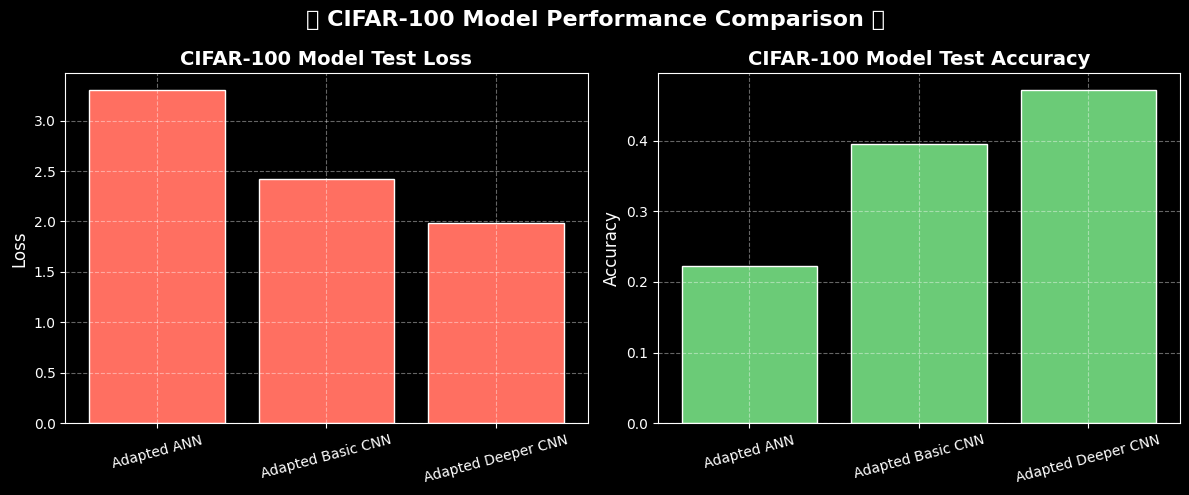

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report

# Load the best weights for each model
cifar100_ann_model.load_weights('best_cifar100_ann_model_weights.weights.h5')
cifar100_basic_cnn_model.load_weights('best_cifar100_basic_cnn_model_weights.weights.h5')
cifar100_deeper_cnn_model.load_weights('best_cifar100_deeper_cnn_model_weights.weights.h5')

# Evaluate models on the test set
loss_cifar100_ann, accuracy_cifar100_ann = cifar100_ann_model.evaluate(cifar100_test_images, cifar100_test_labels_one_hot, verbose=0)
loss_cifar100_basic_cnn, accuracy_cifar100_basic_cnn = cifar100_basic_cnn_model.evaluate(cifar100_test_images, cifar100_test_labels_one_hot, verbose=0)
loss_cifar100_deeper_cnn, accuracy_cifar100_deeper_cnn = cifar100_deeper_cnn_model.evaluate(cifar100_test_images, cifar100_test_labels_one_hot, verbose=0)

# Create a dataframe to store performance data
performance_data_cifar100 = {
    'Model': ['Adapted ANN', 'Adapted Basic CNN', 'Adapted Deeper CNN'],
    'Test Loss': [loss_cifar100_ann, loss_cifar100_basic_cnn, loss_cifar100_deeper_cnn],
    'Test Accuracy': [accuracy_cifar100_ann, accuracy_cifar100_basic_cnn, accuracy_cifar100_deeper_cnn]
}

performance_df_cifar100 = pd.DataFrame(performance_data_cifar100)

print("CIFAR-100 Model Performance Comparison:")
display(performance_df_cifar100)


# Plotting performance comparison
import matplotlib.pyplot as plt
import numpy as np

# Data
models_cifar100 = ['Adapted ANN', 'Adapted Basic CNN', 'Adapted Deeper CNN']
losses_cifar100 = [loss_cifar100_ann, loss_cifar100_basic_cnn, loss_cifar100_deeper_cnn]
accuracies_cifar100 = [accuracy_cifar100_ann, accuracy_cifar100_basic_cnn, accuracy_cifar100_deeper_cnn]

# Dark mode style
plt.style.use("dark_background")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Loss plot
axes[0].bar(models_cifar100, losses_cifar100, color='#FF6F61', edgecolor='white')
axes[0].set_title('CIFAR-100 Model Test Loss', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.4)
axes[0].tick_params(axis='x', rotation=15)


# Accuracy plot
axes[1].bar(models_cifar100, accuracies_cifar100, color='#6BCB77', edgecolor='white')
axes[1].set_title('CIFAR-100 Model Test Accuracy', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.4)
axes[1].tick_params(axis='x', rotation=15)


# Overall title
plt.suptitle("✨ CIFAR-100 Model Performance Comparison ✨", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

#### 4.2) Confusion Matrix & Classification Report for CIFAR-100

Generate and visualize confusion matrices and classification reports for each adapted model on the CIFAR-100 test set.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


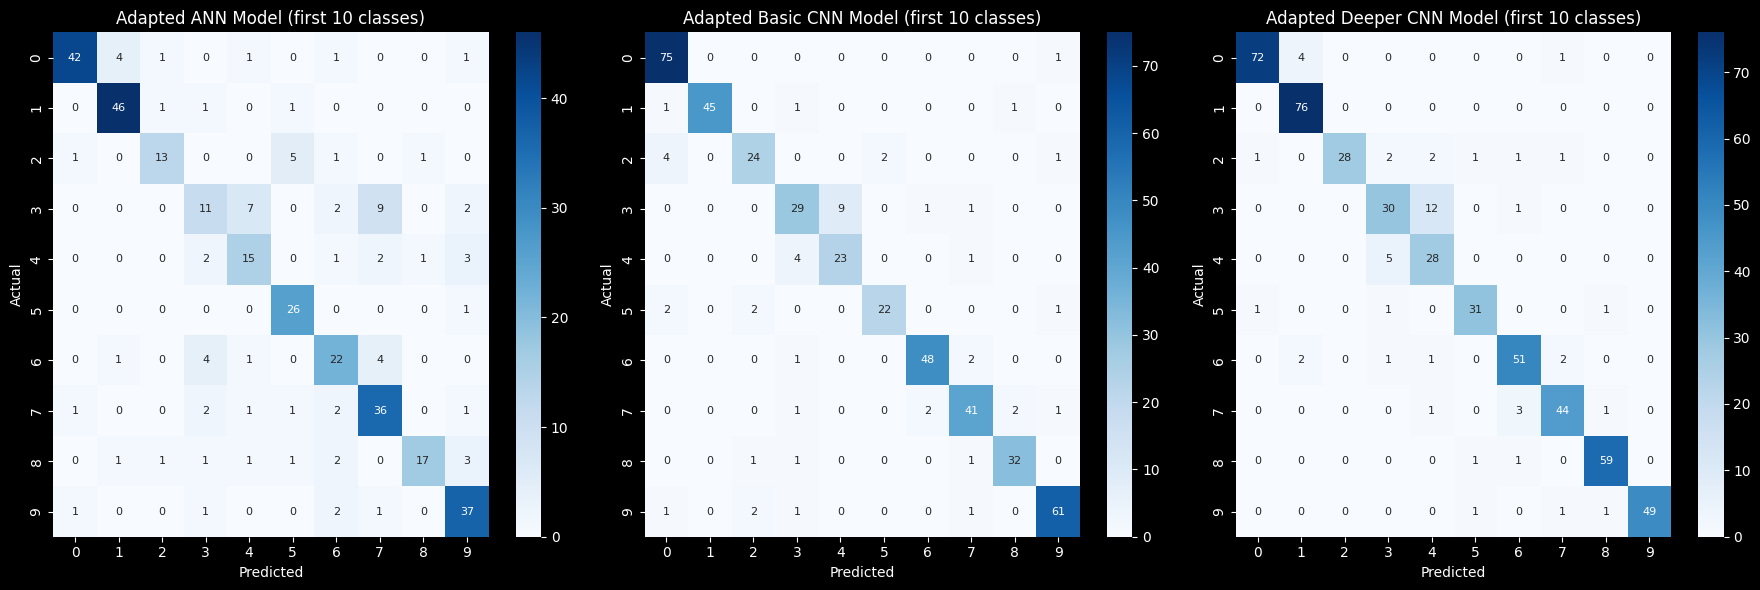


Adapted ANN Model Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.42      0.44       100
           1       0.26      0.46      0.33       100
           2       0.22      0.13      0.16       100
           3       0.11      0.11      0.11       100
           4       0.13      0.15      0.14       100
           5       0.18      0.26      0.21       100
           6       0.15      0.22      0.18       100
           7       0.19      0.36      0.25       100
           8       0.25      0.17      0.20       100
           9       0.24      0.37      0.29       100
          10       0.08      0.01      0.02       100
          11       0.16      0.08      0.11       100
          12       0.20      0.23      0.21       100
          13       0.21      0.19      0.20       100
          14       0.22      0.13      0.16       100
          15       0.20      0.10      0.13       100
          16       0.31      0.17      

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Predictions
cifar100_ann_predictions = cifar100_ann_model.predict(cifar100_test_images)
cifar100_basic_cnn_predictions = cifar100_basic_cnn_model.predict(cifar100_test_images)
cifar100_deeper_cnn_predictions = cifar100_deeper_cnn_model.predict(cifar100_test_images)

# Convert labels
cifar100_test_labels_int = np.argmax(cifar100_test_labels_one_hot, axis=1)

cifar100_ann_predicted_labels = np.argmax(cifar100_ann_predictions, axis=1)
cifar100_basic_cnn_predicted_labels = np.argmax(cifar100_basic_cnn_predictions, axis=1)
cifar100_deeper_cnn_predicted_labels = np.argmax(cifar100_deeper_cnn_predictions, axis=1)

# Confusion matrices (selecting a subset for visualization due to 100 classes)
# We will plot the first 10x10 sub-matrix for clarity in visualization
num_classes_to_show = 10

cm_cifar100_ann = confusion_matrix(cifar100_test_labels_int, cifar100_ann_predicted_labels)
cm_cifar100_basic = confusion_matrix(cifar100_test_labels_int, cifar100_basic_cnn_predicted_labels)
cm_cifar100_deeper = confusion_matrix(cifar100_test_labels_int, cifar100_deeper_cnn_predicted_labels)


fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(cm_cifar100_ann[:num_classes_to_show, :num_classes_to_show], annot=True, fmt="d", cmap="Blues", ax=axes[0], annot_kws={"size": 8})
axes[0].set_title(f"Adapted ANN Model (first {num_classes_to_show} classes)")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_cifar100_basic[:num_classes_to_show, :num_classes_to_show], annot=True, fmt="d", cmap="Blues", ax=axes[1], annot_kws={"size": 8})
axes[1].set_title(f"Adapted Basic CNN Model (first {num_classes_to_show} classes)")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

sns.heatmap(cm_cifar100_deeper[:num_classes_to_show, :num_classes_to_show], annot=True, fmt="d", cmap="Blues", ax=axes[2], annot_kws={"size": 8})
axes[2].set_title(f"Adapted Deeper CNN Model (first {num_classes_to_show} classes)")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()


# Classification reports
print("\nAdapted ANN Model Classification Report:")
print(classification_report(cifar100_test_labels_int, cifar100_ann_predicted_labels))

print("\nAdapted Basic CNN Model Classification Report:")
print(classification_report(cifar100_test_labels_int, cifar100_basic_cnn_predicted_labels))

print("\nAdapted Deeper CNN Model Classification Report:")
print(classification_report(cifar100_test_labels_int, cifar100_deeper_cnn_predicted_labels))

#### 4.3) Training History Visualization for CIFAR-100

Plot the training history (accuracy and loss vs. epochs) for each adapted model on the CIFAR-100 dataset.

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

models_cifar100_history = {
    "Adapted ANN": ("cyan", cifar100_ann_history),
    "Adapted Basic CNN": ("magenta", cifar100_basic_cnn_history),
    "Adapted Deeper CNN": ("yellow", cifar100_deeper_cnn_history)
}


fig = make_subplots(rows=1, cols=2, subplot_titles=('Accuracy', 'Loss'))

for name, (color, history) in models_cifar100_history.items():
    # Accuracy
    fig.add_trace(go.Scatter(y=history.history['accuracy'], mode='lines',
                             name=name, line=dict(color=color, dash='solid')), row=1, col=1)
    fig.add_trace(go.Scatter(y=history.history['val_accuracy'], mode='lines',
                             name=name, line=dict(color=color, dash='dot'), showlegend=False), row=1, col=1)

    # Loss
    fig.add_trace(go.Scatter(y=history.history['loss'], mode='lines',
                             name=name, line=dict(color=color, dash='solid')), row=1, col=2)
    fig.add_trace(go.Scatter(y=history.history['val_loss'], mode='lines',
                             name=name, line=dict(color=color, dash='dot'), showlegend=False), row=1, col=2)

fig.update_layout(
    title_text="CIFAR-100 Model Comparison: Accuracy & Loss (Train=Solid, Val=Dot)",
    height=500,
    width=1200,
    template="plotly_dark"
)

fig.show()

### 5. Prediction Analysis for CIFAR-100

#### 5.1) Analyze Predictions with Adapted Deeper CNN Model

This code:
- Uses the trained **Adapted Deeper CNN model** to predict on CIFAR-100 test images.
- Identifies **correctly** and **incorrectly** classified samples.
- Randomly selects a mix of correct and incorrect predictions.
- Displays them in a grid, indicating correct (green) or incorrect (red) predictions. For incorrect predictions, both the predicted and true class indices are shown.

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


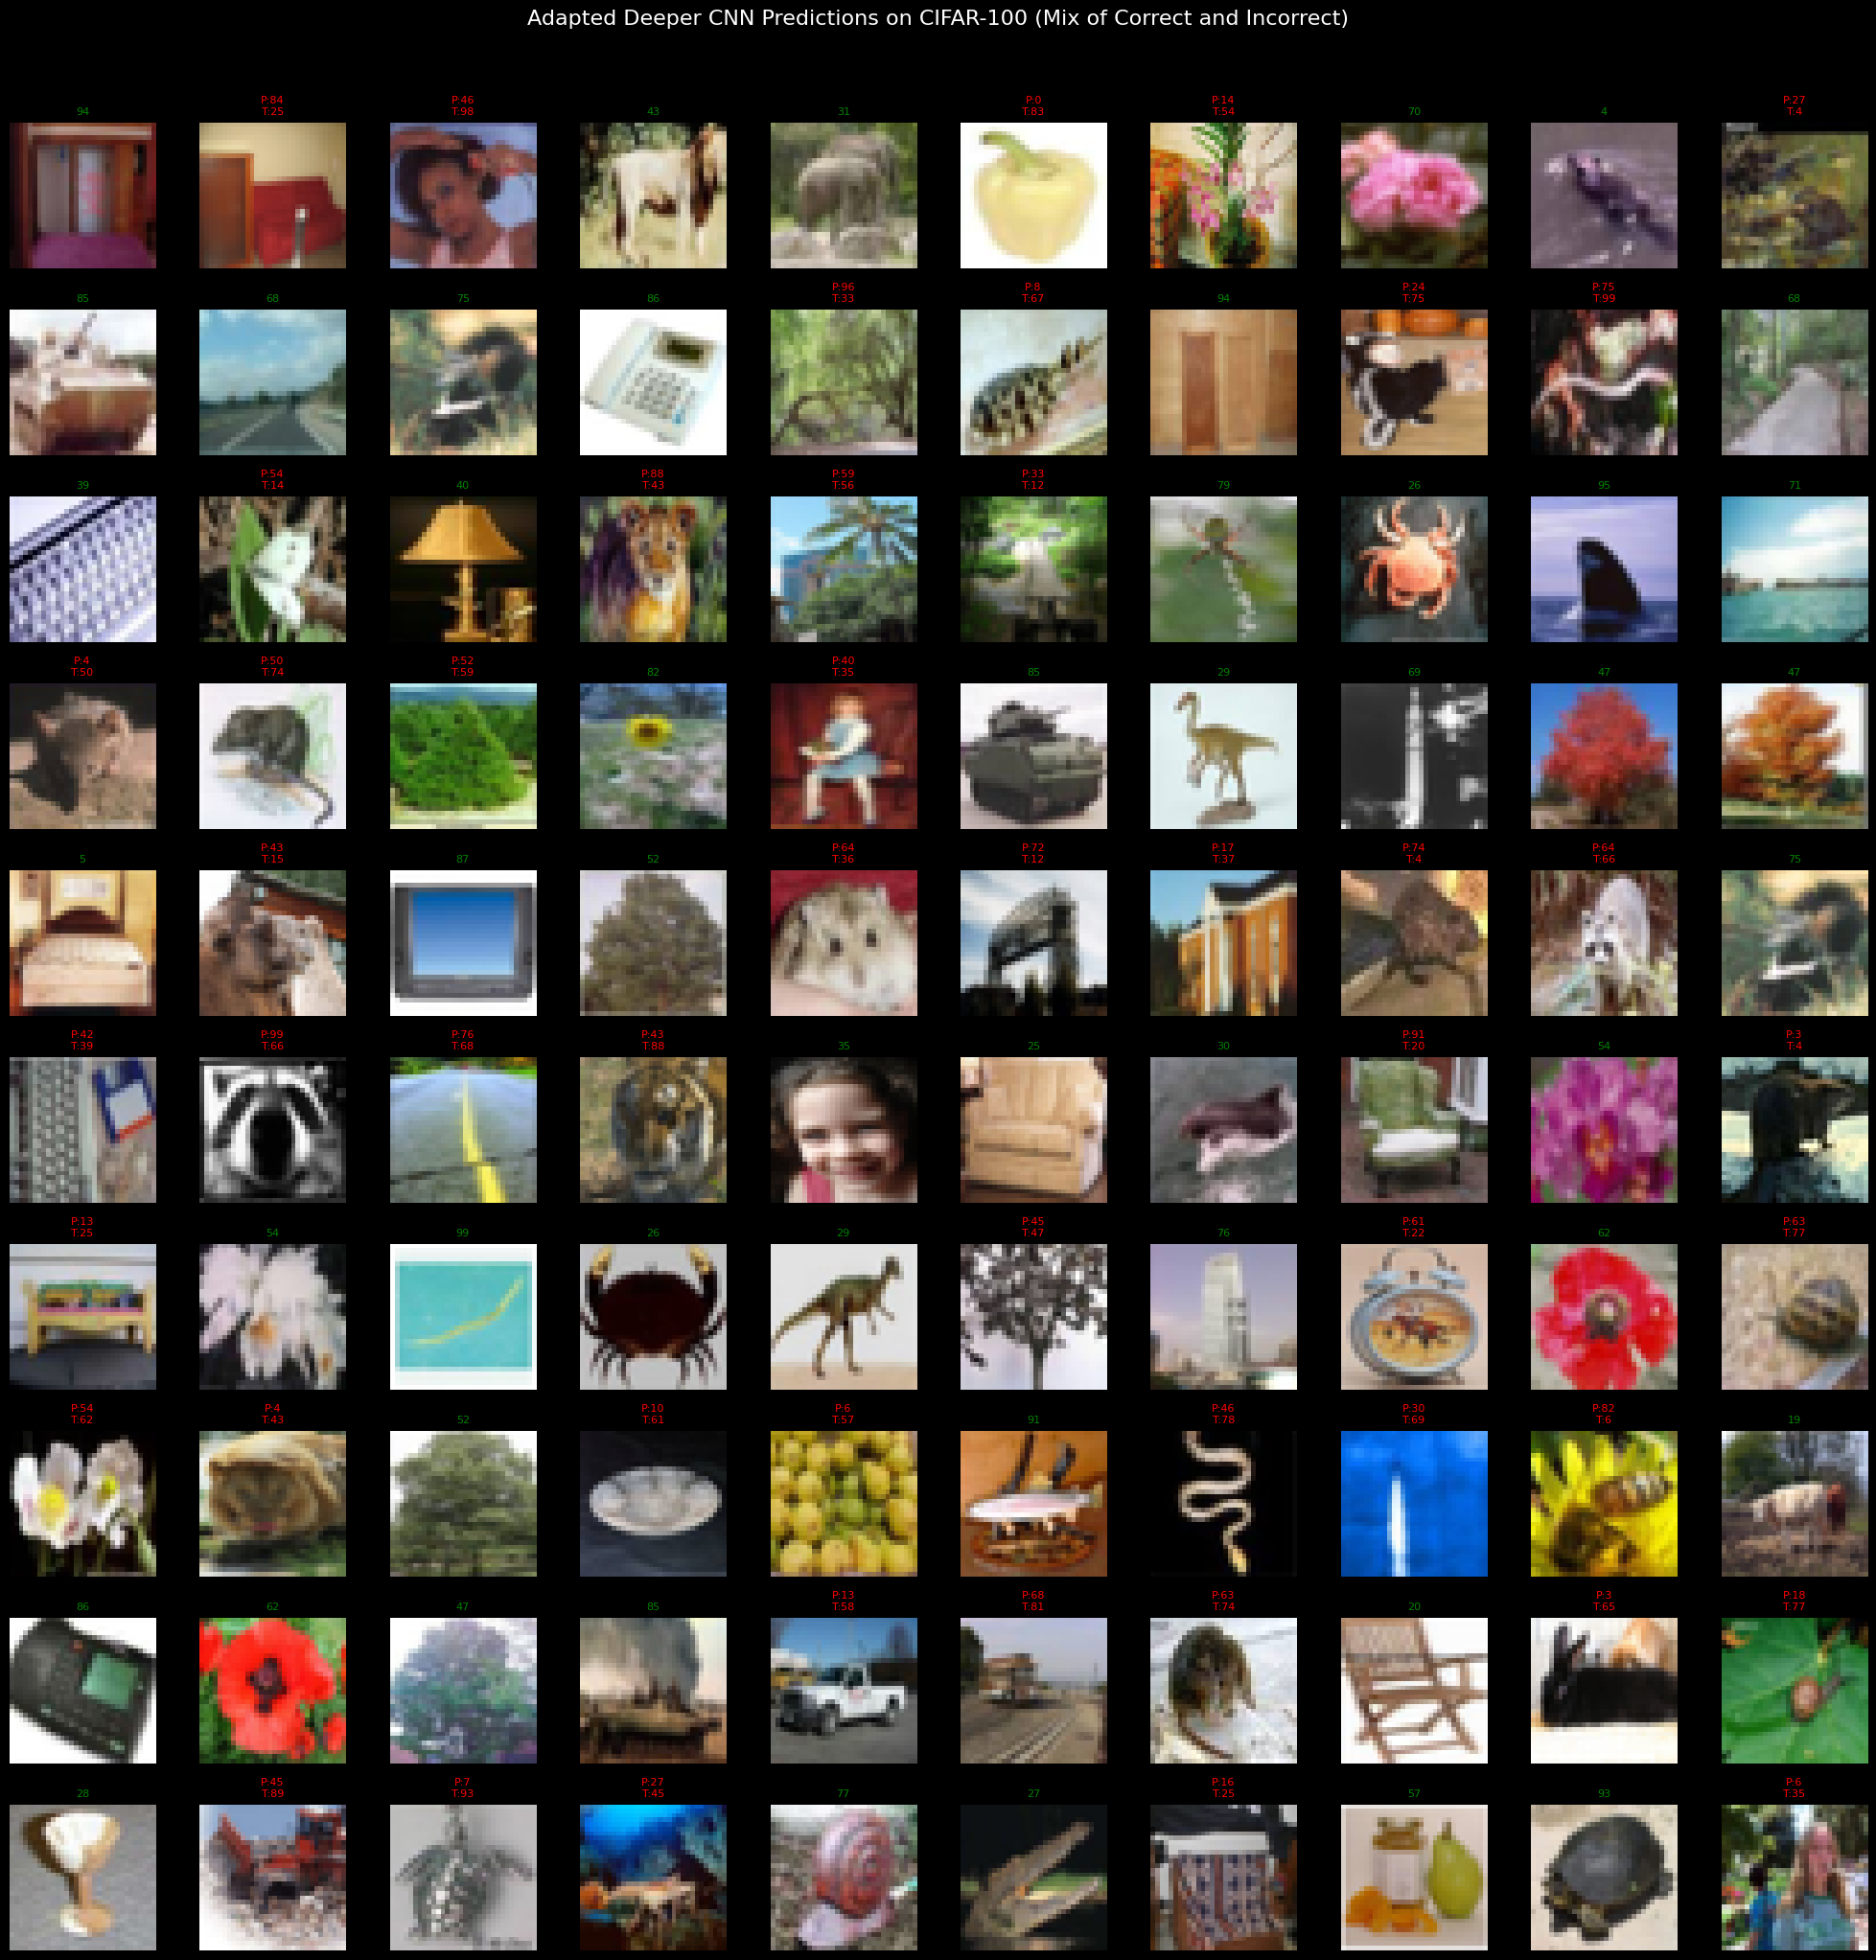

In [ ]:
# Predictions with the best performing model (Adapted Deeper CNN)
cifar100_deeper_cnn_predictions = cifar100_deeper_cnn_model.predict(cifar100_test_images)
cifar100_deeper_cnn_predicted_labels = np.argmax(cifar100_deeper_cnn_predictions, axis=1)

# Find correctly and incorrectly classified images
cifar100_test_labels_int = np.argmax(cifar100_test_labels_one_hot, axis=1)
correctly_classified_indices_cifar100 = np.where(cifar100_deeper_cnn_predicted_labels == cifar100_test_labels_int)[0]
incorrectly_classified_indices_cifar100 = np.where(cifar100_deeper_cnn_predicted_labels != cifar100_test_labels_int)[0]

# Select a mix of correctly and incorrectly classified images
num_correct_to_show_cifar100 = 50
num_incorrect_to_show_cifar100 = 50

# Ensure we don't try to show more images than available
num_correct_to_show_cifar100 = min(num_correct_to_show_cifar100, len(correctly_classified_indices_cifar100))
num_incorrect_to_show_cifar100 = min(num_incorrect_to_show_cifar100, len(incorrectly_classified_indices_cifar100))

selected_correct_indices_cifar100 = np.random.choice(correctly_classified_indices_cifar100, num_correct_to_show_cifar100, replace=False)
selected_incorrect_indices_cifar100 = np.random.choice(incorrectly_classified_indices_cifar100, num_incorrect_to_show_cifar100, replace=False)

# Combine and shuffle the indices
all_indices_cifar100 = np.concatenate((selected_correct_indices_cifar100, selected_incorrect_indices_cifar100))
np.random.shuffle(all_indices_cifar100)

# Display images in a grid
num_cols_cifar100 = 10
num_rows_cifar100 = (num_correct_to_show_cifar100 + num_incorrect_to_show_cifar100) // num_cols_cifar100
if (num_correct_to_show_cifar100 + num_incorrect_to_show_cifar100) % num_cols_cifar100 != 0:
    num_rows_cifar100 += 1

fig, axes = plt.subplots(num_rows_cifar100, num_cols_cifar100, figsize=(2 * num_cols_cifar100, 2 * num_rows_cifar100))
fig.suptitle("Adapted Deeper CNN Predictions on CIFAR-100 (Mix of Correct and Incorrect)", fontsize=16, y=1.02)

for i, idx in enumerate(all_indices_cifar100):
    row = i // num_cols_cifar100
    col = i % num_cols_cifar100
    axes[row, col].imshow(cifar100_test_images[idx])

    pred_label = cifar100_deeper_cnn_predicted_labels[idx]
    true_label = cifar100_test_labels_int[idx]

    if pred_label == true_label:
        color = "green"
        title = f"{pred_label}"
    else:
        color = "red"
        title = f"P:{pred_label}\nT:{true_label}"

    axes[row, col].set_title(title, fontsize=8, color=color)
    axes[row, col].axis("off")

plt.tight_layout()
plt.show()

## CIFAR-100 Project Summary and Conclusion

This project successfully applied the concepts and techniques from the Fashion-MNIST project to the more complex CIFAR-100 dataset, building and comparing adapted ANN and CNN models for image classification.

**Summary of Work:**

1. **Dataset Preparation:** The CIFAR-100 dataset was loaded, normalized, and one-hot encoded, preparing the 32x32 color images and 100 classes for model input.
2. **Model Adaptation:** The ANN and CNN model architectures were adapted for the CIFAR-100 dataset, adjusting the input layers, increasing the number of neurons in dense layers, and adding an extra convolutional layer to the CNNs to handle the increased complexity.
3. **Model Training:** Each adapted model was trained using the preprocessed CIFAR-100 training data with Early Stopping and Model Checkpointing to optimize training and save the best performing weights.
4. **Model Evaluation:** The trained models were evaluated on the CIFAR-100 test set. Performance metrics (loss and accuracy) were calculated and compared. Training history plots and confusion matrices (showing the first 10 classes for visualization clarity) were generated to analyze model performance.
5. **Prediction Analysis:** Predictions were made using the best performing model (Adapted Deeper CNN), and examples of correctly and incorrectly classified images were visualized to gain insights into the model's behavior on this dataset.

**Key Findings and Conclusion:**

Based on the evaluation results on the CIFAR-100 dataset:

* The **Adapted Deeper CNN model** achieved the highest test accuracy and lowest test loss among the three adapted models, demonstrating its superior performance on this more challenging dataset. This highlights the benefit of a deeper architecture with additional convolutional layers and regularization techniques (Batch Normalization and Dropout) for capturing more complex features in color images with a larger number of classes.
* The **Adapted Basic CNN model** performed significantly better than the Adapted ANN model, reinforcing the effectiveness of convolutional layers for image classification tasks, especially on datasets with more visual complexity than Fashion-MNIST.
* The **Adapted ANN model**, while providing a baseline, struggled significantly with the complexity of the CIFAR-100 dataset, resulting in the lowest accuracy and highest loss. This underscores the limitations of simple feedforward networks for complex image recognition tasks.

In conclusion, for the CIFAR-100 dataset, increasing model complexity through a deeper CNN architecture with appropriate regularization proved to be the most effective approach among the models tested. The CNN architectures, even the basic one, showed a clear advantage over the simple ANN. This project successfully demonstrated how model architecture choices and complexity impact performance on datasets with varying levels of difficulty and characteristics.